# Harmony Search

let $\mathbb{X}^{t}$ the population at time $t$, $f: \mathbb{X} \rightarrow \mathbb{R}$ the objective function, $g_i(x) \leq 0$ for $i=1,2,\ldots,m_1$ the soft restrictions and $h_i(x) = 0$ for $i=1,2,\ldots,m_2$ the hard restrictions of an optimization problem. Set $hcmr \sim U\left[0, 1\right]$ and $par \sim U\left[0, 1\right]$ where $U[0,1]$ is distributed uniformly. Set $\alpha \in [0, 1]$

1. Get $w^{t}$ the worst harmony as $\max_{x\in \mathbb{X}} f(x)$.

2. Set $I_1, I_2 \sim U[0,1]$ random numbers between 0 and 1.

3. <br>
&emsp; <b>IF</b> $I_1 \leq hcmr$ <b>THEN</b>: <br>
    &emsp;&emsp; $v_{i}^{t + 1} = U(\mathbb{X}_i^{t})$ where $U(\mathbb{X}_i^{t})$ is a uniform distributed random variable over the set of $i$-th variables from the population set $\mathbb{X}^{t + 1}$. <br>
    &emsp;&emsp; <b>IF</b> $I_2 \leq par$ <b>THEN</b>: <br>
        &emsp;&emsp;&emsp; $x_{i}^{t+1} = v_{i}^{t+1} + \alpha \cdot U[-1, 1]$ where $U[-1, 1]$ is a random variable between -1 and 1. <br>
    &emsp;&emsp; <b>ELSE</b>: <br>
        &emsp;&emsp;&emsp; $x_{i}^{t+1} = v_{i}^{t+1}$ <br>
    &emsp;&emsp; <b>ENDIF</b> <br>
&emsp; <b>ELSE</b>: <br>
    &emsp;&emsp; $x_{i}^{t+1} = U([x_i^{sup}, x_{i}^{inf}])$ where $U([x_i^{sup}, x_{i}^{inf}])$ is a random variable between the $x_{i}$ variable range. <br>
&emsp; <b>ENDIF</b> <br><br>
    
4. Select best harmony between $w^{t}$ and $x^{t+1}$ using DEB conditions. **If** $w^{t}$ is the best **then** $\mathbb{X}^{t+1} = \mathbb{X}^{t}$ **else** $\mathbb{X}^{t+1} = \mathbb{X}^{t}\cup \left\lbrace x^{t+1} \right\rbrace - \left\lbrace w^{t} \right\rbrace$.



In [1]:
from IPython.display import display_markdown
from pyIpnHeuristic.benchmark import get_pg06

problem_parameters = get_pg06()

objective_function = problem_parameters.get("objective_function")
g = problem_parameters.get("gx")
h = problem_parameters.get("hx")
ranges = problem_parameters.get("ranges")
markdown = problem_parameters.get("markdown")
x_best = problem_parameters.get("x")
fx_best = problem_parameters.get("fx")

display_markdown(markdown, raw=True)

## Problem G06:
Minimize: 
$$f(\mathbf{x}) = (x_1 - 10)^3 + (x_2 - 20)^3$$
subject to:
$$g_1(\mathbf{x}) = -(x_1-5)^2 - (x_2-5)^2 + 100 \leq 0 $$
$$g_2(\mathbf{x}) = (x_1-6)^2 + (x_2-5)^2 - 82.81 \leq 0 $$
where: $13 \leq x_1 \leq 100$, $0 \leq x_2 \leq 100$

## Initialize Harmony

In [7]:
from pyIpnHeuristic.harmonySearch import HarmonySearch

population_size = 5

harmonySearch = HarmonySearch(
    objective_function,
    soft_constrains=g,
    hard_constrains=h,
    ranges=ranges,
    population_size=population_size,
    smooth=False,
    epsilon=10**-4,
    hcmr=0.50,
    par=0.50,
    alpha=10**-3
)

harmonySearch.search(iterations=200000, save_history=True)

## Results

In [8]:
import pandas as pd
import numpy as np

pd.DataFrame(
    sorted([{**hist, 
             "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
             "fxi - Fx": hist["fx"] - fx_best} 
            for hist in harmonySearch.history], key=lambda x: x["iteration"], reverse=True)
)

,x,fx,gx,hx,iteration,||xi-X||,fxi - Fx
0,"[14.095050990141186, 0.8430678047937122]",-6961.693489,0.000000,0,200000,0.000119,0.120386
1,"[14.095050990141186, 0.8430678047937122]",-6961.693489,0.000000,0,199999,0.000119,0.120386
2,"[14.095050990141186, 0.8430678047937122]",-6961.693489,0.000000,0,199998,0.000119,0.120386
3,"[14.095050990141186, 0.8430678047937122]",-6961.693489,0.000000,0,199997,0.000119,0.120386
4,"[14.095050990141186, 0.8430678047937122]",-6961.693489,0.000000,0,199996,0.000119,0.120386
...,...,...,...,...,...,...,...
199995,"[20.534918215939193, 9.196278790037782]",-91.801925,146.062603,0,5,10.547534,6870.011951
199996,"[20.534918215939193, 9.196278790037782]",-91.801925,146.062603,0,4,10.547534,6870.011951
199997,"[20.534918215939193, 9.196278790037782]",-91.801925,146.062603,0,3,10.547534,6870.011951
199998,"[20.534918215939193, 9.196278790037782]",-91.801925,146.062603,0,2,10.547534,6870.011951


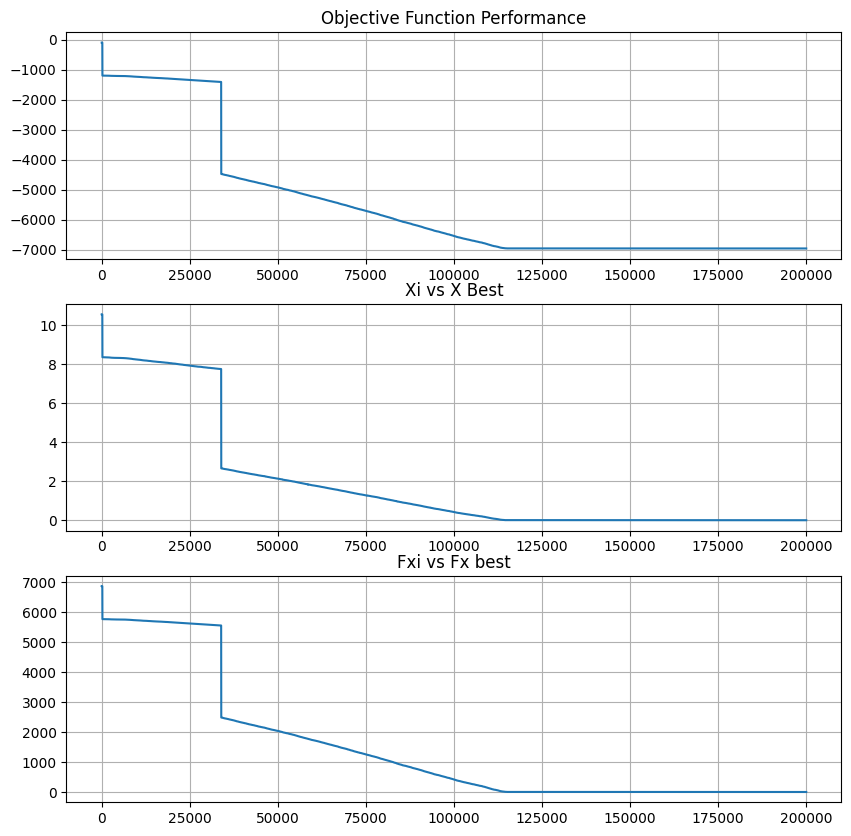

In [9]:
from _display import display_performance_results

rich_history = [{**hist, "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
  "fxi - Fx": hist["fx"] - fx_best} for hist in harmonySearch.history]
display_performance_results(rich_history)